In [1]:
import numpy as np  
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')/255
x_train = x_train[:1]
x_train.shape

Using TensorFlow backend.


(1, 28, 28)

In [2]:
x_train = np.expand_dims(x_train, 3)
x_train.shape

(1, 28, 28, 1)

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 2))
n = len(x_train)
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.gray()

2000
(2000, 28, 28, 1)
(2000, 28, 28, 1)


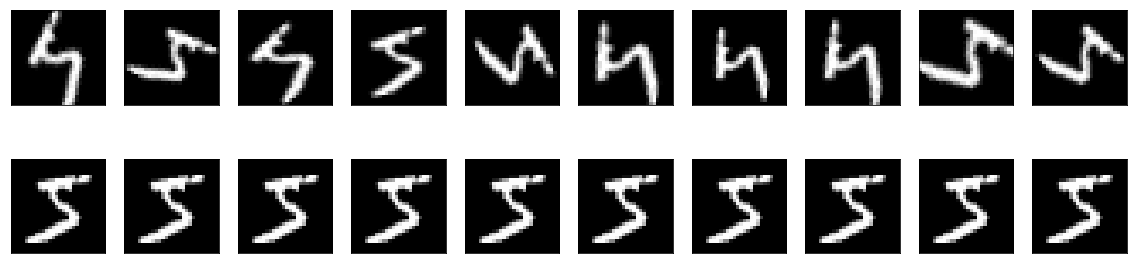

In [4]:
from keras.preprocessing.image import ImageDataGenerator

#-- ImageDataGenerator - https://keras.io/preprocessing/image/
total_aug = 2000
datagen = ImageDataGenerator(
        rotation_range=90,
        shear_range=0.4,
        zoom_range=0.2,
        fill_mode='nearest',
        data_format='channels_last')

x_aug = np.array([])
y_aug = np.array([])
for x, y in datagen.flow(x_train, x_train, batch_size=20):
    x_aug = np.concatenate((x_aug, x)) if 0 < len(x_aug) else x
    y_aug = np.concatenate((y_aug, y)) if 0 < len(y_aug) else y
    if total_aug <= len(x_aug):        
        break

print len(x_aug)
print x_aug.shape
print y_aug.shape
        
plt.figure(figsize=(20, 5))
n = 10
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_aug[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y_aug[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.gray()

In [5]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D
from keras import regularizers

input_img = Input(shape=(28, 28, 1)) 
x = Conv2D(64, (3, 3), activation='sigmoid', padding='same', name="c1")(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same', name="c3")(x)

x = UpSampling2D((2, 2))(encoded)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='last_layer')(x)

autoencoder = Model(inputs=input_img, outputs=decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
train_history = autoencoder.fit(x=x_aug, y=y_aug, batch_size=20, epochs=10, shuffle=True)

Epoch 1/10
2000/2000 [==============================] - 24s 12ms/step - loss: 0.3046
Epoch 2/10
2000/2000 [==============================] - 24s 12ms/step - loss: 0.2033
Epoch 3/10
2000/2000 [==============================] - 24s 12ms/step - loss: 0.1800
Epoch 4/10
2000/2000 [==============================] - 24s 12ms/step - loss: 0.1590
Epoch 5/10
2000/2000 [==============================] - 24s 12ms/step - loss: 0.1396
Epoch 6/10
2000/2000 [==============================] - 23s 12ms/step - loss: 0.1264
Epoch 7/10
2000/2000 [==============================] - 24s 12ms/step - loss: 0.1171
Epoch 8/10
2000/2000 [==============================] - 24s 12ms/step - loss: 0.1086
Epoch 9/10
2000/2000 [==============================] - 23s 12ms/step - loss: 0.1023
Epoch 10/10
2000/2000 [==============================] - 24s 12ms/step - loss: 0.0979


In [6]:
decoded_imgs = autoencoder.predict(x_aug)
print x_aug.shape
print decoded_imgs.shape

(2000, 28, 28, 1)
(2000, 28, 28, 1)


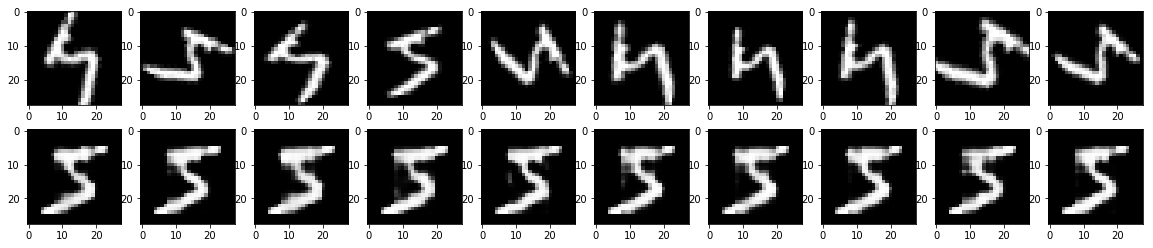

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
n = 10
for i in range(n):    
    plt.subplot(2, n, i + 1)
    img = x_aug[i]
    plt.imshow(img.reshape(28,28))
    
    plt.subplot(2, n, i + 1 + n)    
    plt.imshow(decoded_imgs[i].reshape(28,28))
plt.gray()